##Download the model

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model("/content/signs.png")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 62.2MB/s]



image 1/1 /content/signs.png: 608x640 1 stop sign, 38.7ms
Speed: 13.3ms preprocess, 38.7ms inference, 352.1ms postprocess per image at shape (1, 3, 608, 640)


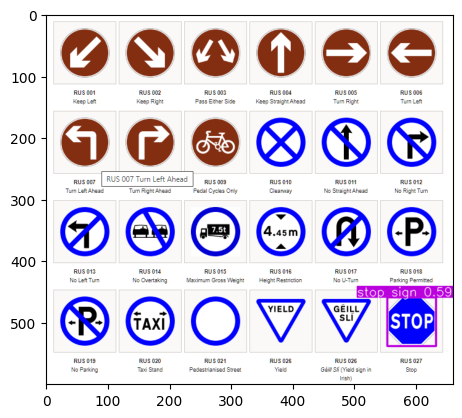

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(results[0].plot())

##Get data

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d pkdarabi/cardetection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/cardetection
License(s): Attribution 4.0 International (CC BY 4.0)
 76% 76.0M/99.8M [00:00<00:00, 793MB/s]
100% 99.8M/99.8M [00:00<00:00, 837MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cardetection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import matplotlib.pyplot as plt
import os
import random

def check_and_see(folder="valid", predict=False, model=YOLO("yolov8n.pt"), image=None):
  """
  Function to check and see the images extracted.
  """
  image_folder = f"/content/car/{folder}/images"
  label_folder = f"/content/car/{folder}/labels"

  # get a random image from the foler
  num = len(os.listdir(image_folder))
  r = random.randint(0, num-1)
  img = os.listdir(image_folder)[r]

  if not predict:
    # display the image
    plt.imshow(plt.imread(f"{image_folder}/{img}"))
    print(f"{image_folder}/{img}")
  else:
    if not img:
      # predict with model
      results = model(f"{image_folder}/{img}")
      plt.imshow(results[0].plot())
    else:
      # predict with model
      results = model(image)
      plt.imshow(results[0].plot())

/content/car/valid/images/00014_00023_00012_png.rf.b5d04ed4520fe1613bacb494db5d350f.jpg


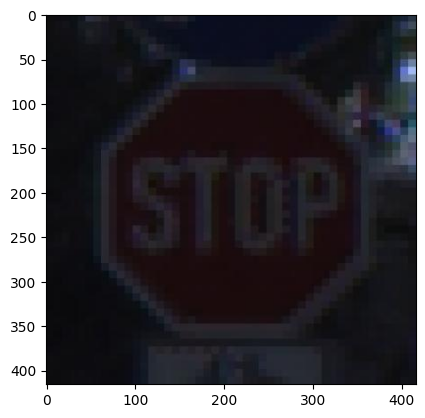

In [ ]:
check_and_see()

In [ ]:
def save_weights(results):
  """
  Saves the inputed results and returns the best weigths path
  """
  save_dir = results.save_dir
  best_weights_path = f"{save_dir}/weights/best.pt"
  return best_weights_path

##Fine tune number 1
Fine tune vs retraining the whole thing

In [ ]:
results_1 = model.train(data="/content/car/data.yaml", epochs=10, imgsz=640, name="fine_tune_1")

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fine_tune_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

100%|██████████| 755k/755k [00:00<00:00, 13.8MB/s]

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 759.6±241.5 MB/s, size: 24.1 KB)


train: Scanning /content/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 2256.04it/s]

train: New cache created: /content/car/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 706.0±403.2 MB/s, size: 20.7 KB)


val: Scanning /content/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 1165.80it/s]


val: New cache created: /content/car/valid/labels.cache
Plotting labels to runs/detect/fine_tune_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fine_tune_1
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.07G       1.94      5.316      2.033         17        640:  63%|██████▎   | 139/221 [00:39<00:23,  3.50it/s]


KeyboardInterrupt: 

In [ ]:
# was that fine tuning?
# NO we were retraining...
# let's see how yolo looks:
model.info()

In [ ]:
# Check the submodules first
print("Submodules inside model.model:")
for i, (name, module) in enumerate(model.model.named_children()):
    print(f"{i}: {name} -> {module}")

# Suppose the backbone is named "backbone"
for name, module in model.model.named_children():
    if name == "backbone":
        for param in module.parameters():
            param.requires_grad = False

# Verify freezing
print("\nParameter requires_grad status:")
for name, param in model.named_parameters():
    print(f"{name}: requires_grad = {param.requires_grad}")


In [ ]:
results_1 = model.train(data="/content/car/data.yaml", epochs=10, imgsz=640, name="fine_tune_1")

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fine_tune_14, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0005, plots=True, pose=12.0, pretra

train: Scanning /content/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 257.6±113.0 MB/s, size: 20.7 KB)


val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/fine_tune_14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fine_tune_14
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.67G     0.5843     0.5252     0.9926         14        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.37it/s]

                   all        801        944      0.916      0.828      0.911      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.84G     0.6616     0.6052      1.027         28        640:  64%|██████▍   | 142/221 [00:41<00:32,  2.41it/s]


image 1/1 /content/speed.jpg: 448x640 2 Speed Limit 100s, 5 Speed Limit 120s, 34.9ms
Speed: 2.5ms preprocess, 34.9ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


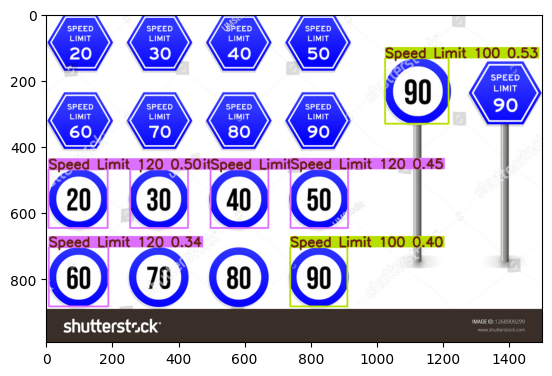

In [ ]:
# get best weights path
best_1 = save_weights(results_1)

# predict using those first weights
check_and_see(predict=True, model=YOLO(best_1), image="/content/speed.jpg")

In [ ]:
# get confusion matrix from the runs
plt.imshow(plt.imread("/content/runs/detect/fine_tune_12/confusion_matrix.png"))

In [ ]:
# get precision-recall curves
plt.imshow(plt.imread("/content/runs/detect/fine_tune_12/PR_curve.png"))

## Fine-tune 2
We're going to add:
- Data augmentation

In [ ]:
results_2 = model.train(
    data="/content/car/data.yaml",
    epochs=10,
    imgsz=640,
    name="fine_tune_2",
    lr0=0.001,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    degrees=10,
    scale=0.5,
    translate=0.1,
    shear=2.0,
    perspective=0.0005
)

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fine_tune_2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0005, plots=True, pose=12.0, pretrai

train: Scanning /content/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.1±0.2 ms, read: 347.2±133.3 MB/s, size: 20.7 KB)


val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/fine_tune_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fine_tune_2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.21G     0.9101      1.092      1.266         14        640: 100%|██████████| 221/221 [01:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.65it/s]

                   all        801        944      0.861      0.761      0.848      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.68G     0.8228      1.061      1.149         14        640: 100%|██████████| 221/221 [01:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.20it/s]

                   all        801        944      0.846      0.728      0.834      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.68G     0.7886      1.006      1.126         12        640: 100%|██████████| 221/221 [01:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.75it/s]

                   all        801        944      0.888      0.736      0.842      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.68G     0.7799      0.953      1.116         12        640: 100%|██████████| 221/221 [01:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.19it/s]

                   all        801        944      0.876      0.726      0.846       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.68G     0.7516     0.8673      1.088         12        640: 100%|██████████| 221/221 [01:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.26it/s]

                   all        801        944      0.868      0.792       0.88      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.68G     0.7185     0.8022      1.075         12        640: 100%|██████████| 221/221 [01:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.76it/s]

                   all        801        944      0.893      0.787      0.883      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.68G     0.7127     0.7454      1.069         14        640: 100%|██████████| 221/221 [01:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.84it/s]

                   all        801        944      0.908      0.799      0.889      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.7G     0.6917     0.7112      1.045         11        640: 100%|██████████| 221/221 [01:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.24it/s]

                   all        801        944        0.9      0.821      0.906       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.7G     0.6809     0.6848      1.048         18        640: 100%|██████████| 221/221 [01:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.72it/s]

                   all        801        944      0.936      0.811      0.905      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.7G     0.6679     0.6538      1.038         10        640: 100%|██████████| 221/221 [01:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.71it/s]

                   all        801        944      0.917      0.829      0.909      0.719



10 epochs completed in 0.193 hours.
Optimizer stripped from runs/detect/fine_tune_2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/fine_tune_2/weights/best.pt, 6.2MB

Validating runs/detect/fine_tune_2/weights/best.pt...
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        801        944      0.917      0.829      0.909      0.719
           Green Light         87        122       0.86      0.555      0.731      0.367
             Red Light         74        108      0.767      0.704      0.746       0.41
       Speed Limit 100         52         52      0.804      0.923      0.942      0.801
       Speed Limit 110         17         17       0.81      0.882      0.907      0.735
       Speed Limit 120         60         60      0.921      0.883      0.958      0.809
        Speed Limit 20         56         56          1       0.91       0.98      0.811
        Speed Limit 30         71         74       0.94      0.932      0.964      0.779
        Speed Limit 40         53         55      0.959      0.852      0.967      0.746
        Speed Limit 50         68         71      0.946      0.743      0.894      0.741
        Speed Limit 60         76         76          1      0.867      0.939      0.765
        Speed Limit 7


image 1/1 /content/speed.jpg: 448x640 3 Speed Limit 100s, 5 Speed Limit 120s, 1 Speed Limit 30, 7.2ms
Speed: 2.6ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


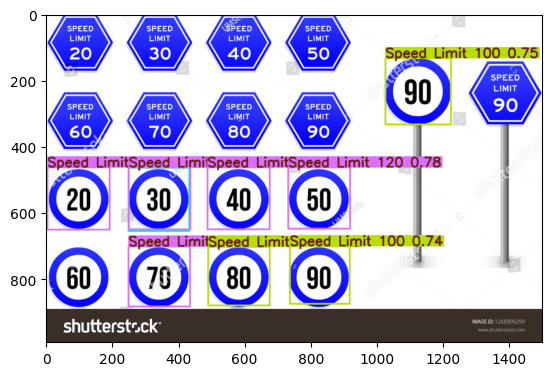

In [ ]:
# get best weights path
best_2 = save_weights(results_2)

# predict using those first weights
check_and_see(predict=True, model=YOLO(best_2), image="/content/speed.jpg")

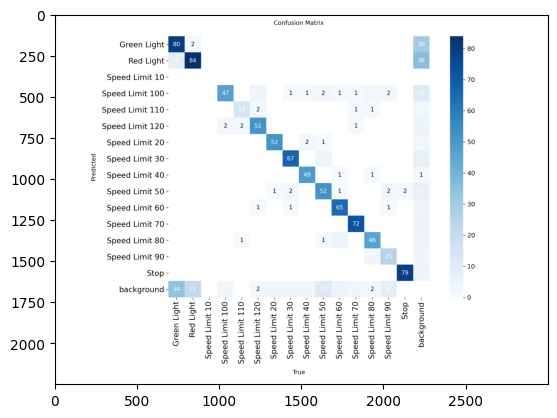

In [ ]:
# get confusion matrix from the runs
plt.imshow(plt.imread("/content/runs/detect/fine_tune_2/confusion_matrix.png"))

##Fine Tune 3 Augmentation
- Canny
- Grayscale
-

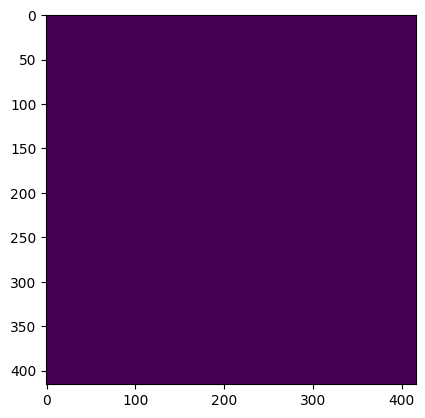

In [ ]:
import cv2
img = cv2.imread("/content/car/valid/images/00003_00006_00022_png.rf.256efc029550f2940ca77830d7aa592a.jpg")
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply canny edge
edges = cv2.Canny(grayscale, 0, 350) # lower and upper thresholds for edge linking
plt.imshow(edges)

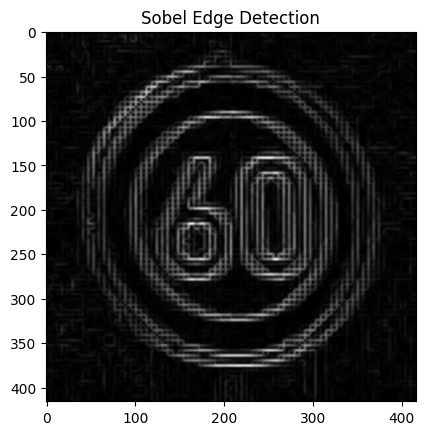

In [ ]:
# Sobel (X and Y direction)
sobelx = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=7) # smaller the kernel size, the best for sharp edges but more sensitive to noise
sobely = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=7)
sobel = cv2.magnitude(sobelx, sobely)

# Laplacian
laplacian = cv2.Laplacian(grayscale, cv2.CV_64F)

# Display
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()


In [ ]:
import cv2
import os
import random
import numpy as np

# Paths
input_folder = '/content/car/train/images'

# Probability to apply Sobel
apply_prob = 0.3  # 30% chance

# Iterate through each image
for filename in os.listdir(input_folder):
    if not filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    image_path = os.path.join(input_folder, filename)
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if random.random() < apply_prob:
        # Apply Sobel edge detection (combined X and Y)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        sobel_combined = cv2.magnitude(sobelx, sobely)
        sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

        # Optional: Convert back to BGR for compatibility with model training
        sobel_image = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2BGR)
    else:
        sobel_image = image

    # Save augmented image
    cv2.imwrite(image_path, sobel_image)


/content/car/train/images/FisheyeCamera_1_00362_png.rf.bb64ccd7735b465ad4db884c4f7d4b6f.jpg


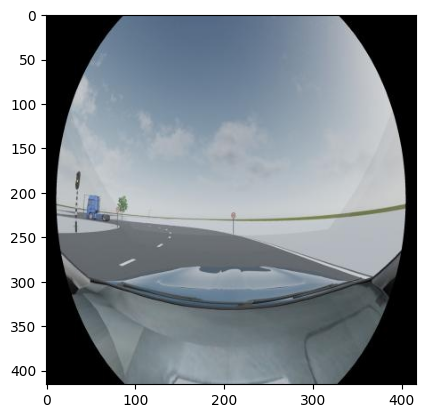

In [ ]:
check_and_see(folder="train")

In [ ]:
results_3 = model.train(data="/content/car/data.yaml", epochs=10, imgsz=640, name="fine_tune_3", lr0=0.001, lrf=0.01)

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fine_tune_3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0005, plots=True, pose=12.0, pretrai

train: Scanning /content/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 2598.65it/s]

train: New cache created: /content/car/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 263.7±168.6 MB/s, size: 20.7 KB)


val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/fine_tune_3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fine_tune_3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.2G     0.7682     0.8656      1.116         14        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.40it/s]

                   all        801        944      0.906      0.822      0.896      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.66G     0.7475     0.8418      1.093         14        640: 100%|██████████| 221/221 [01:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.74it/s]

                   all        801        944      0.869      0.789      0.885      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.66G     0.7353     0.8435      1.093         12        640: 100%|██████████| 221/221 [01:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.24it/s]

                   all        801        944      0.887      0.802      0.879      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.66G     0.7432     0.8036      1.099         12        640: 100%|██████████| 221/221 [01:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.77it/s]

                   all        801        944      0.892      0.771      0.882      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.66G     0.7128     0.7669      1.068         12        640: 100%|██████████| 221/221 [01:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.75it/s]

                   all        801        944      0.881      0.831      0.896       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.66G     0.6914     0.7015      1.061         12        640: 100%|██████████| 221/221 [01:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.33it/s]

                   all        801        944       0.91      0.804      0.896      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.66G     0.6868      0.676      1.055         14        640: 100%|██████████| 221/221 [01:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.14it/s]

                   all        801        944      0.895      0.841      0.911      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.66G      0.673     0.6507       1.04         11        640: 100%|██████████| 221/221 [01:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.69it/s]

                   all        801        944      0.891      0.842      0.915      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.66G     0.6656     0.6371       1.04         18        640: 100%|██████████| 221/221 [01:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.34it/s]

                   all        801        944      0.917      0.839      0.913       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.66G       0.66     0.6176      1.037         10        640: 100%|██████████| 221/221 [01:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.75it/s]

                   all        801        944      0.894      0.849      0.916      0.739



10 epochs completed in 0.193 hours.
Optimizer stripped from runs/detect/fine_tune_3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/fine_tune_3/weights/best.pt, 6.2MB

Validating runs/detect/fine_tune_3/weights/best.pt...
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]


                   all        801        944      0.893      0.848      0.916      0.739
           Green Light         87        122      0.812      0.638      0.737      0.396
             Red Light         74        108      0.756      0.731      0.771      0.409
       Speed Limit 100         52         52      0.838      0.923      0.962      0.823
       Speed Limit 110         17         17      0.726      0.765      0.885      0.741
       Speed Limit 120         60         60      0.884      0.891      0.963      0.834
        Speed Limit 20         56         56      0.986      0.911      0.984      0.827
        Speed Limit 30         71         74      0.971      0.919      0.976      0.814
        Speed Limit 40         53         55      0.962      0.913       0.97      0.775
        Speed Limit 50         68         71      0.912      0.803      0.904      0.759
        Speed Limit 60         76         76      0.935      0.882       0.94      0.782
        Speed Limit 7


image 1/1 /content/speed.jpg: 448x640 4 Speed Limit 100s, 5 Speed Limit 120s, 2 Speed Limit 30s, 7.5ms
Speed: 2.4ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


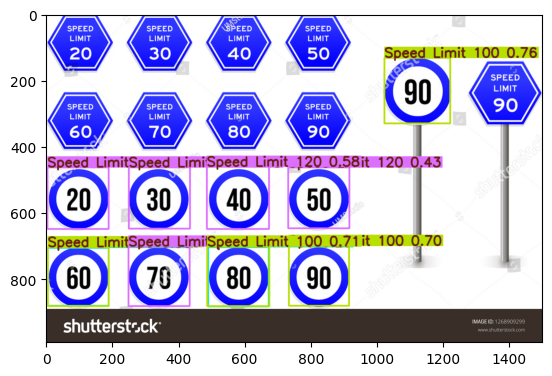

In [ ]:
# get best weights path
best_3 = save_weights(results_3)

# predict using those first weights
check_and_see(predict=True, model=YOLO(best_3), image="/content/speed.jpg")